In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [5]:
def plot_img(i):
    plt.imshow(x_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

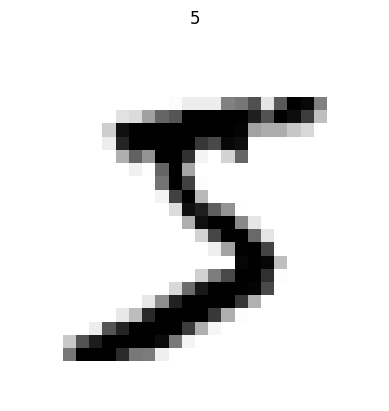

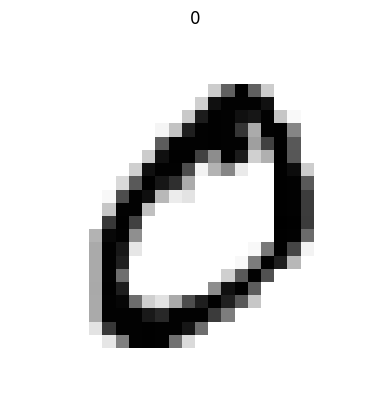

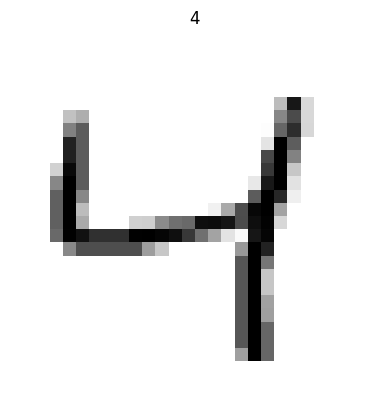

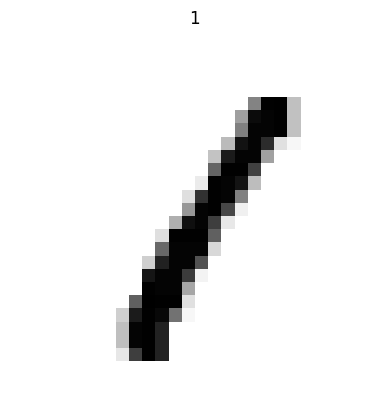

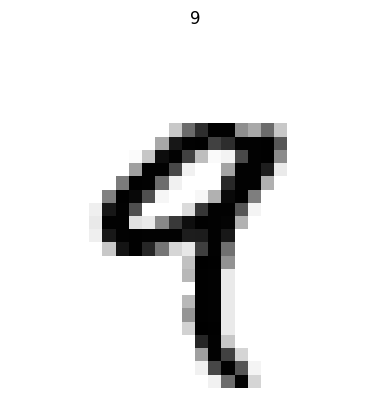

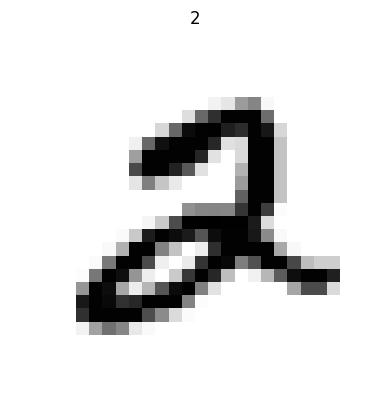

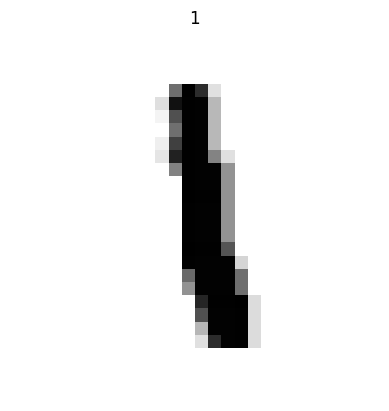

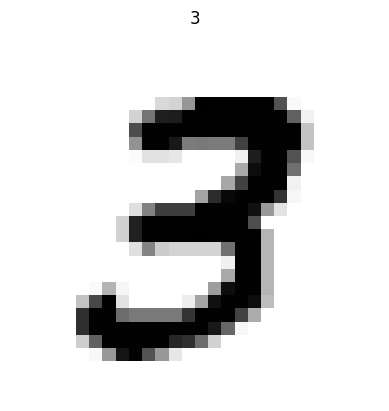

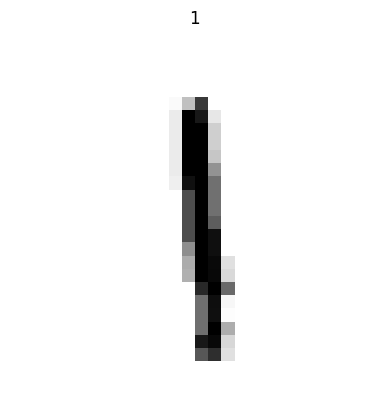

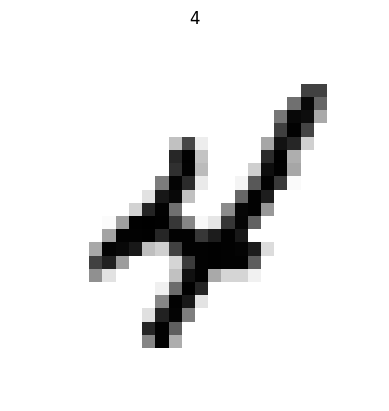

In [6]:
for i in range(10):
    plot_img(i)

In [7]:
x_train=x_train.astype(np.float32)/255
y_test=x_test.astype(np.float32)/255
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


In [8]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.models import Sequential

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
from keras.callbacks import EarlyStopping, ModelCheckpoint
es=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)
mc=ModelCheckpoint("./phkmodel.h5",monitor="val_acc",verbose=1,save_best_only=True)

In [12]:
cb=[es,mc]
his=model.fit(x_train,y_train,epochs=50,validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 21s 15ms/step - loss: 0.2122 - accuracy: 0.9361 - val_loss: 0.0771 - val_accuracy: 0.9754
Epoch 2/50
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0716 - accuracy: 0.9776 - val_loss: 0.0576 - val_accuracy: 0.9826
Epoch 3/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0495 - val_accuracy: 0.9853
Epoch 4/50
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0473 - val_accuracy: 0.9859
Epoch 5/50
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0414 - val_accuracy: 0.9877
Epoch 6/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0415 - val_accuracy: 0.9884
Epoch 7/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0384 -